Download Dataset

In [1]:
!kaggle datasets download -d rahuljagadishhirur/envyident

Dataset URL: https://www.kaggle.com/datasets/rahuljagadishhirur/envyident
License(s): Apache 2.0
 60% 5.00M/8.27M [00:00<00:00, 32.6MB/s]
100% 8.27M/8.27M [00:00<00:00, 42.7MB/s]


In [2]:
!unzip /content/envyident.zip

Archive:  /content/envyident.zip
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-09-10.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-09-15.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-09-20.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-09-25.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-09-30.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-09-41.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-09-46.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-09-56.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-10-06.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-10-11.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-10-21.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-10-26.jpg  
  inflating: EnvIdnetification/train/room1/image_2024-05-28_22-10-3

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [4]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(240),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
'''Model-2'''
# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
#         # Convolutional layers
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)  # Adjust in_channels to 3
#         self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
#         # Max pooling layer
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         # Fully connected layers
#         self.fc1 = nn.Linear(64 * 60 * 60, 128)  # Adjust the input size based on your image dimensions
#         self.fc2 = nn.Linear(128, 10)  # Output size is 10 for classification task

#     def forward(self, x):
#         # Convolutional layers with ReLU activation and max pooling
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         # Flatten the output for fully connected layers
#         x = x.view(-1, 64 * 60 * 60)  # Adjust the input size based on your image dimensions
#         # Fully connected layers with ReLU activation
#         x = torch.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# # Create an instance of the SimpleCNN model
# model = SimpleCNN()

'Model-2'

In [6]:
train_dir = '/content/EnvIdnetification/train'
val_dir = '/content/EnvIdnetification/val'

In [7]:
# Load the datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=preprocess)
val_dataset = datasets.ImageFolder(root=val_dir, transform=preprocess)

In [8]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [9]:
model = models.mobilenet_v2(pretrained=True)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 2)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 41.8MB/s]


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
#Training


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")


Epoch [1/20], Loss: 0.15147942492476432
Epoch [2/20], Loss: 0.020250948684406467
Epoch [3/20], Loss: 0.013606581279600505
Epoch [4/20], Loss: 0.016678272273566108
Epoch [5/20], Loss: 0.006922141748054856
Epoch [6/20], Loss: 0.0045438116561854255
Epoch [7/20], Loss: 0.22781337016494946
Epoch [8/20], Loss: 0.33242213164339773
Epoch [9/20], Loss: 0.07879317314364016
Epoch [10/20], Loss: 0.02301574175944552
Epoch [11/20], Loss: 0.19012682767570369
Epoch [12/20], Loss: 0.3208099564697477
Epoch [13/20], Loss: 0.031473436939995734
Epoch [14/20], Loss: 0.017178666840482037
Epoch [15/20], Loss: 0.22326770189538364
Epoch [16/20], Loss: 0.010086701239197282
Epoch [17/20], Loss: 0.024429512111237273
Epoch [18/20], Loss: 0.010208327465807087
Epoch [19/20], Loss: 0.20353206966028664
Epoch [20/20], Loss: 0.13846336036658613


In [12]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')


Accuracy: 96.73202614379085%


In [13]:
# Initialize variables for metrics
correct = 0
total = 0
all_labels = []
all_predicted = []

# Set the model to evaluation mode
model.eval()

# Turn off gradient calculation
with torch.no_grad():
    for images, labels in val_loader:  # Assuming val_loader is your validation data loader
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Update total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Collect true and predicted labels for further analysis
        all_labels.extend(labels.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())

# Calculate additional metrics
accuracy = 100 * correct / total
precision = precision_score(all_labels, all_predicted, average='weighted')
recall = recall_score(all_labels, all_predicted, average='weighted')
f1 = f1_score(all_labels, all_predicted, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_predicted)

# Print the metrics
print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 96.73%
Precision: 0.9680
Recall: 0.9673
F1 Score: 0.9673


Confusion Matrix:


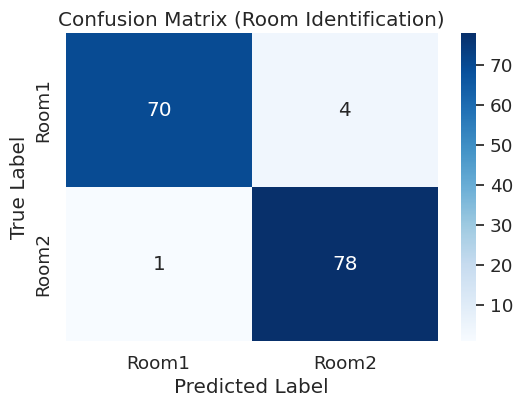

In [14]:
print('Confusion Matrix:')

# Define class names
class_names = ['Room1', 'Room2']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Room Identification)')
plt.show()

ROC Curve:


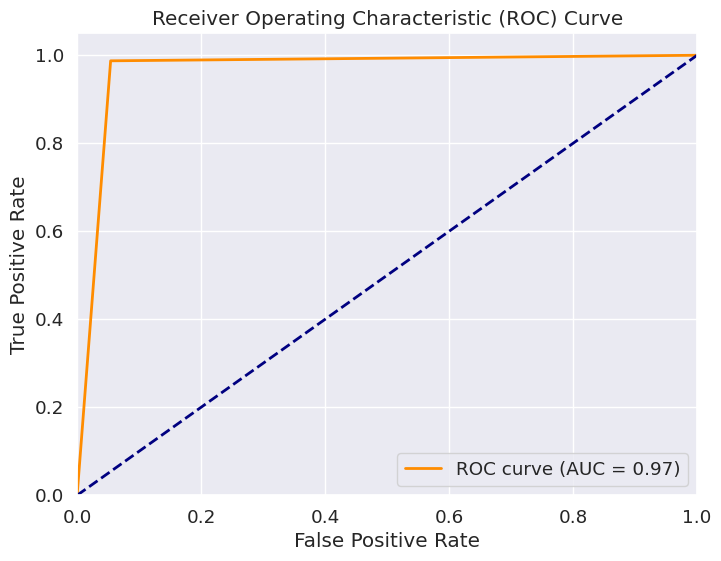

In [15]:
# Calculate the ROC curve
print("ROC Curve:")
fpr, tpr, _ = roc_curve(all_labels, all_predicted)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:
torch.save(model.state_dict(), 'custom_model.pth')


In [17]:
def predict_image(image_path, model, transform):
    model.eval()
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    return predicted.item()

In [18]:
# Example usage
image_path = '/content/EnvIdnetification/val/room2/image_2024-05-29_14-14-24.jpg'
prediction = predict_image(image_path, model, preprocess)

if prediction == 0:
    print("This is Room 1")
else:
    print("This is Room 2")

This is Room 2
